## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix
from matplotlib.colors       import ListedColormap


## Step 2: Import Dataset

## X = dataset.iloc[:, 0:13].values -> x is 2d array --> array of (0 to 12)
## Y = dataset.iloc[:, 13].values ---> y is 1d array --> only 13 

In [2]:
# Assuming you have the 'Wine.csv' dataset in the working directory
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
Y = dataset.iloc[:, 13].values


In [3]:
dataset.keys()

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [4]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [5]:
# X,Y

## Step 3: Split Dataset

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


## Step 4: Feature Scaling

In [7]:
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)


## Step 5: Apply PCA

In [8]:
pca                = PCA(n_components=2)
X_train            = pca.fit_transform(X_train)
X_test             = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [22]:
explained_variance

array([0.36884109, 0.19318394])

## Step 6: Fit Logistic Regression Model

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


LogisticRegression(random_state=0)

## Step 7: Predict the Testing Set

In [10]:
Y_pred = classifier.predict(X_test)


## Step 8: Confusion Matrix

In [11]:
cm = confusion_matrix(Y_test, Y_pred)


In [12]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

## Step 9: Visualize Training Set Results

In [13]:
# def plot_decision_boundary(X_set, Y_set, title, x_label, y_label, legend_labels):

#     # 1. area, stepsize of the points
#     X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
#                          np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

#     # 2. area, color, transpirancy of background color
#     plt.contourf(X1, X2, 
#                  classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#                  alpha=0.75, 
#                  cmap=ListedColormap(['red', 'grey', 'green']))

#     # 3. scaling how large we want the axis
#     plt.xlim(X1.min(), X1.max())
#     plt.ylim(X2.min(), X2.max())

#     # 4. plotting points -- hence independent of x1, x2 -- points => x_set[y_set == label, class] or (x_set, y_set)
#     for i, label in enumerate(np.unique(Y_set)):
#         plt.scatter(X_set[Y_set == label, 0], 
#                     X_set[Y_set == label, 1],
#                     c=ListedColormap(['red', 'grey', 'green'])(i), 
#                     label=str(label))

#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.legend(legend_labels)
#     plt.show()


/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_11126/679128547.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == label, 0],


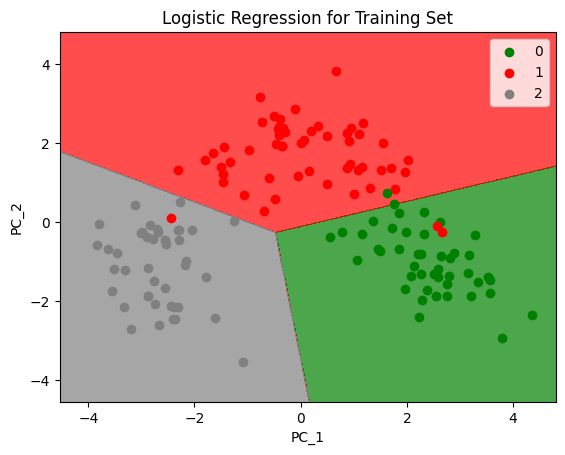

In [24]:
def plot_decision_boundary(x_set, y_set, title, x_label, y_label,  legend_labels):
    x1, x2 = np.meshgrid(
                    np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step=0.01))

    colors = ListedColormap(['green', 'red', 'grey'])

    # scaling graph
    plt.xlim(x1.min(), x1.max())
    plt.xlim(x2.min(), x2.max())
    
    
    # background color -- tour
    plt.contourf(x1, x2,
                 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha=0.7,
                 cmap = colors)

    
    # plotting points -- independent of x1, x2 -- plotting points (x,y) == x_set[y_set == label, 0]
    for i, label in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == label, 0],
                    x_set[y_set == label, 1],
                    c = colors(i),
                    label = str(label))

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_labels)
    plt.show()
    

plot_decision_boundary(X_train, Y_train, 'Logistic Regression for Training Set', 'PC_1', 'PC_2', legend_labels=['0', '1', '2'])

## Step 10: Visualize Testing Set Results

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_11126/679128547.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == label, 0],


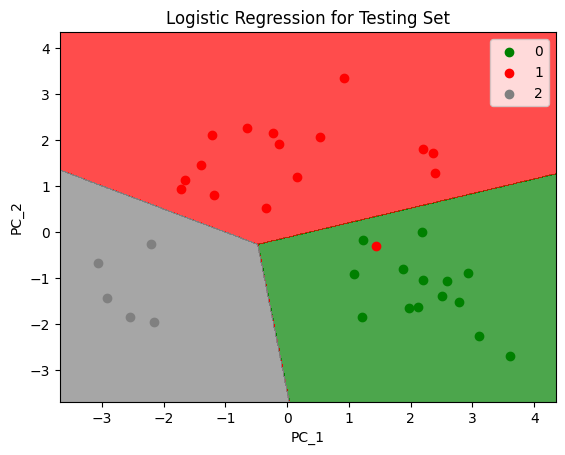

In [21]:
plot_decision_boundary(X_test, Y_test, 'Logistic Regression for Testing Set', 'PC_1', 'PC_2', ['0', '1', '2'])
